# Introduction to Python 
# Homework #5
- Due Sunday Oct 14 at 8pm
- This homework will be graded
- You MUST submit on CourseWorks2 before it closes
    - Verify your submission succeeded
    - Email submissions are not accepted 
    

# Academic Honesty
* The computer science department has strict polices. Check
the department [web page](http://www.cs.columbia.edu/education/honesty) for details. 
- Do not look at anybody else's source code. Do not show anybody
your source, or leave your source where somebody could see it.
You MUST write your own code.
- For this class, feel free to discuss issues with other people, but suggest waiting an hour or two after a discussion, before writing your code.
-  Cases of non original source will be refered to the Judical Committee.



# Ramanujan (super math genius) created a super magic square. 
- The top row is his birthdate (December 22, 1887). 
- It is a regular magic square - the rows, columns, and diagonals add up to 139,
- But it has four additional properties!
    - A - the four corners (22, 87, 19, 11)
    - B - the four middle elements (17, 9, 24, 89), 
    - C - the first and last rows' two middle numbers (12, 18, 86, 23), 
    - D - the first and last columns' two middle numbers (88, 10, 25, 16)
    - each also sums to 139!
- fascinating [book](https://clio.columbia.edu/catalog/966852) and film about his life

In [116]:
import numpy as np

ram = np.array([22,12,18,87,88,17,9,25,10,24,89,16,19,86,23,11])
ram = ram.reshape((4,4))
ram

array([[22, 12, 18, 87],
       [88, 17,  9, 25],
       [10, 24, 89, 16],
       [19, 86, 23, 11]])

# Problem 1
- write four one line expressions to verify the additional properties. 
- the first should verify A, 2nd B, 3rd C, 4th D
- you can use the 'sum' method, but you cannot use '+' or explicit 'for' loops

In [117]:
# verifying A
np.array([ram[0][0], ram[0][-1], ram[-1][0], ram[-1][-1]]).sum()

139

In [118]:
# verifying B
ram[1:3, 1:3].sum()

139

In [119]:
# verifying C
np.array([ram[0][1:3], ram[3][1:3]]).sum()

139

In [120]:
# verifying D
np.array([ram[1,0], ram[1,-1], ram[2,0], ram[2,-1]]).sum()

139

# Problem 2
## Plot Bessel Functions
- 'j0' computes the 'bessel special function'
    - looks like a decaying sine wave
    - like sin, crosses the x axis(y=0) an infinite number of times
    - [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.j0.html#scipy.special.j0)
- use 'jn_zeros' to find the zeros(where function plot crosses x axis) of 'j0' 
    - [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jn_zeros.html#scipy.special.jn_zeros)
    - first arg must be 0

In [121]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import math

# make plots render in the notebook
%matplotlib inline

# values of j0
[scipy.special.j0(1), scipy.special.j0(2)]

[0.76519768655796649, 0.22389077914123562]

In [122]:
# note j0() takes lists...

scipy.special.j0([0,1])

array([ 1.        ,  0.76519769])

In [123]:
# ...and arrays as args 
# returns an array of the evaluations

scipy.special.j0(np.array([0,1]))

array([ 1.        ,  0.76519769])

In [124]:
# first arg to jn_zeros must be 0

# first three zeros of j0

scipy.special.jn_zeros(0, 3)


array([ 2.40482556,  5.52007811,  8.65372791])

In [125]:
# check the zeros

scipy.special.j0(scipy.special.jn_zeros(0, 3))

array([ -9.58688255e-17,  -1.64951298e-17,  -8.70443181e-17])

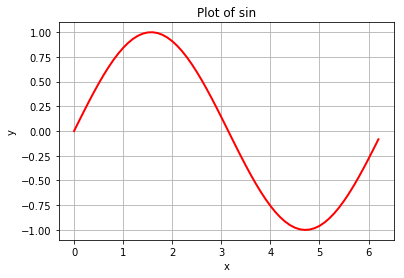

In [126]:
# this will plot a numpy vector function

def plotf(func, low, high):
    # arg is a vector function to plot
    # make a set of x vals
    x = np.arange(low, high, .1)
    # eval the func on the x vals
    y = func(x)
    plt.plot(x, y, 'r', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    plt.title('Plot of sin')
    
plotf(np.sin, 0, 2*math.pi)

# define function bessel(zeros)
- arrange to plot enough of the bessel function to show
the requested number of zeros.
- start the plot at x = 0 on the left
- go as far right as needed to display the requested number of zeros
- for a smooth plot, evaluate j0 at .1 increments(x = .0, .1, .2,...)
    - can use np.arange to generate the x values
    - [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)
- use matplotlib
    - your plot title, x & y labels, should be the same as mine
- return the list of j0 zeros

In [127]:
def bessel(zeros):
    zeros_list = scipy.special.jn_zeros(0, zeros)
    maximum = zeros_list[-1]
    x = np.arange(0, maximum, 0.1)
    y = scipy.special.j0(x)
    plt.plot(x, y, 'r', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('J 0')
    plt.grid(True)
    plt.title('{} zeros of J0'.format(zeros))
    
    return zeros_list

array([ 2.40482556,  5.52007811])

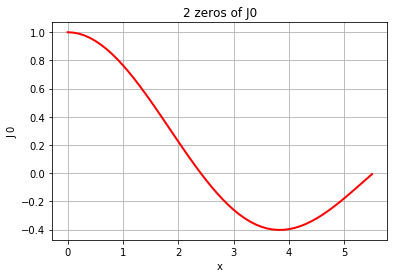

In [128]:
bessel(2)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444,  14.93091771])

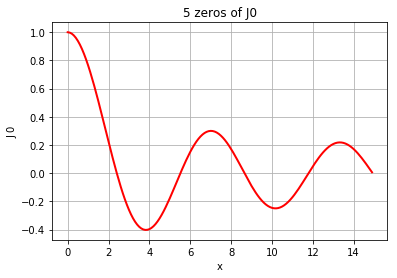

In [129]:
bessel(5)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444,
        14.93091771,  18.07106397,  21.21163663,  24.35247153,
        27.49347913,  30.63460647])

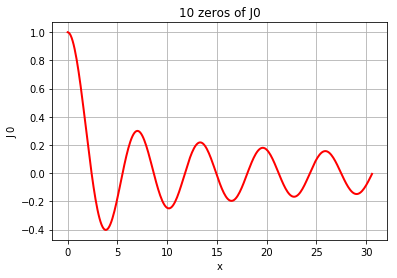

In [130]:
bessel(10)

# Problems  3, 4, & 5
# define savings() 
- make a pandas DataFrame that shows how money will grow with compound interest
- pd.date_range takes these [frequency specs](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)
- use floats for money
- I will show you how to build the DataFrame in several steps below, using the default args
- your ultimate goal is to define the savings function shown below that does all the steps, using
the supplied or default args

In [131]:
from datetime import datetime
import pandas as pd

In [132]:
# with the arg defaults shown, this will 
# calculate the money accumulated after 
# 31 days, with weekly deposits of $10, 
# at a 10% interest rate compounded
# on each business day

def savings(start = '2018-03-01', end = '2018-03-31',\
            depositFreq='W', depositAmount=10.,
            compoundFreq='B', interestRate=.1 ):
    # your code here
    
    money = pd.DataFrame(index=pd.date_range(start, end))
    days = pd.Series(pd.date_range(start, end).strftime('%A'), index=pd.date_range(start, end))   
    deposits = pd.Series(depositAmount, index=pd.date_range(start, end, freq=depositFreq))
    compound = pd.Series(interestRate, index=pd.date_range(start, end, freq=compoundFreq))
    intser = pd.Series(0.0, index=pd.date_range(start, end))
    balser = pd.Series(0.0, index=pd.date_range(start, end))
    
    money['days'] = days
    money['deposits'] = deposits
    money['compound'] = compound
    money = money.fillna(0)
    
    balance = 0.
    
    for j,t in enumerate(money.itertuples()):
        # pull out row values
        td = t.deposits
        ti = t.compound
        # calculate interest and new balance
        balance += td
        interest = balance * ti
        balance += interest
        # update the series objects
        balser[j] = balance
        intser[j] = interest
    
    money['interest'] = intser
    money['balance'] = balser
    
    return money
    

# tips

In [133]:
# get day name from a date

datetime.now().strftime('%A')

'Saturday'

In [134]:
# make DataFrame with an index but no columns

days = ['day1', 'day2']
nocol=pd.DataFrame(index=days)
nocol

""
day1
day2


In [135]:
# can give a Series a single data value, 
# and it will be repeated
# to be as long as the index

pd.Series(0, index=days)

day1    0
day2    0
dtype: int64

In [136]:
# a Series can be added as a column to a DataFrame

ser = pd.Series(['Tues','Wed'], index=days)
ser

day1    Tues
day2     Wed
dtype: object

In [137]:
# add ser as a column - like setting a dict

nocol['day'] = ser
nocol

,day
day1,Tues
day2,Wed


In [138]:
# you can iterate over the rows of a 
# DataFrame with itertuples()
# t.X gets the value of the column 
# named X in the row

for t in nocol.itertuples():
    print(t.day)

Tues
Wed


# savings examples

In [139]:
savings()

,days,deposits,compound,interest,balance
2018-03-01,Thursday,0.0,0.1,0.000000,0.000000
2018-03-02,Friday,0.0,0.1,0.000000,0.000000
2018-03-03,Saturday,0.0,0.0,0.000000,0.000000
2018-03-04,Sunday,10.0,0.0,0.000000,10.000000
2018-03-05,Monday,0.0,0.1,1.000000,11.000000
2018-03-06,Tuesday,0.0,0.1,1.100000,12.100000
2018-03-07,Wednesday,0.0,0.1,1.210000,13.310000
2018-03-08,Thursday,0.0,0.1,1.331000,14.641000
2018-03-09,Friday,0.0,0.1,1.464100,16.105100
2018-03-10,Saturday,0.0,0.0,0.000000,16.105100


In [140]:
# more aggressive savings

savings(depositFreq='B')

,days,deposits,compound,interest,balance
2018-03-01,Thursday,10.0,0.1,1.000000,11.000000
2018-03-02,Friday,10.0,0.1,2.100000,23.100000
2018-03-03,Saturday,0.0,0.0,0.000000,23.100000
2018-03-04,Sunday,0.0,0.0,0.000000,23.100000
2018-03-05,Monday,10.0,0.1,3.310000,36.410000
2018-03-06,Tuesday,10.0,0.1,4.641000,51.051000
2018-03-07,Wednesday,10.0,0.1,6.105100,67.156100
2018-03-08,Thursday,10.0,0.1,7.715610,84.871710
2018-03-09,Friday,10.0,0.1,9.487171,104.358881
2018-03-10,Saturday,0.0,0.0,0.000000,104.358881


# howto build the savings pandas in multiple steps

In [141]:
# default interval

start = '2018-03-01'
end = '2018-03-31'

In [142]:
# using pd.date_range, make a DataFrame 
# called 'money' with no columns, and
# an index of all the days in the 
# (start, end) interval

money = pd.DataFrame(index=pd.date_range(start, end))

money

""
2018-03-01
2018-03-02
2018-03-03
2018-03-04
2018-03-05
2018-03-06
2018-03-07
2018-03-08
2018-03-09
2018-03-10


In [143]:
# add a 'day' column to money

days = pd.Series(pd.date_range(start, end).strftime('%A'), index=pd.date_range(start, end))

money['day'] = days

money

,day
2018-03-01,Thursday
2018-03-02,Friday
2018-03-03,Saturday
2018-03-04,Sunday
2018-03-05,Monday
2018-03-06,Tuesday
2018-03-07,Wednesday
2018-03-08,Thursday
2018-03-09,Friday
2018-03-10,Saturday


In [144]:
# make a 'deposits' series, 
# at the correct frequency and amount

deposits = pd.Series(10.0, index=pd.date_range(start, end, freq='W-SUN'))

deposits

2018-03-04    10.0
2018-03-11    10.0
2018-03-18    10.0
2018-03-25    10.0
Freq: W-SUN, dtype: float64

In [145]:
# likewise make series 'compound' of interestRate
# at correct frequency

compound = pd.Series(0.1, index=pd.date_range(start, end, freq='B'))

compound

2018-03-01    0.1
2018-03-02    0.1
2018-03-05    0.1
2018-03-06    0.1
2018-03-07    0.1
2018-03-08    0.1
2018-03-09    0.1
2018-03-12    0.1
2018-03-13    0.1
2018-03-14    0.1
2018-03-15    0.1
2018-03-16    0.1
2018-03-19    0.1
2018-03-20    0.1
2018-03-21    0.1
2018-03-22    0.1
2018-03-23    0.1
2018-03-26    0.1
2018-03-27    0.1
2018-03-28    0.1
2018-03-29    0.1
2018-03-30    0.1
Freq: B, dtype: float64

In [146]:
# now add deposits and compound to money
# do something appropriate with the NaN's
# note that compounding and deposits are 
# on the correct dates

money['deposits'] = deposits
money['compound'] = compound

money

,day,deposits,compound
2018-03-01,Thursday,NaN,0.1
2018-03-02,Friday,NaN,0.1
2018-03-03,Saturday,NaN,NaN
2018-03-04,Sunday,10.0,NaN
2018-03-05,Monday,NaN,0.1
2018-03-06,Tuesday,NaN,0.1
2018-03-07,Wednesday,NaN,0.1
2018-03-08,Thursday,NaN,0.1
2018-03-09,Friday,NaN,0.1
2018-03-10,Saturday,NaN,NaN


In [147]:
# make two more Series objects called 
# intser and balser - they should use the 
# index of all the days that money used, 
# and the initial value of all rows 
# should be 0.0
# these will become the last two columns of money

# run this loop in your savings function
# to do the interest calculation

'''
    for j,t in enumerate(money.itertuples()):
        # pull out row values
        td = t.deposits
        ti = t.compound
        # calculate interest and new balance
        balance += td
        interest = balance * ti
        balance += interest
        # update the series objects
        balser[j] = balance
        intser[j] = interest
'''

# this will load up intser and balser with the 
# appropriate values finally, add them as 
# the 'interest' and 'balance' columns to money


'\n    for j,t in enumerate(money.itertuples()):\n        # pull out row values\n        td = t.deposits\n        ti = t.compound\n        # calculate interest and new balance\n        balance += td\n        interest = balance * ti\n        balance += interest\n        # update the series objects\n        balser[j] = balance\n        intser[j] = interest\n'